# Assignment2 - PS11 Tip Prediction

**Group 128**

Group details as follows

|Name|BITS Id|Contribution|
|:---|:---|:---|
|[Vinayak Nayak](https://github.com/ElisonSherton)|2021fc04135|100%|
|[Niyati Gangwal](https://github.com/NiyatiGangwal)|2021fc04140|100%|
|[Shreysi Kalra](https://github.com/shreyasi25)|2021fc04586|100%|

# Problem Statement

**Predict tip amount given some parameters.**

## Part A

Explore the data and preprocess it.

### Import dataset and libraries

Dataset is downloaded to the disk and libraries are installed in the local conda environment.

In [1]:
# !pip install -q numpy pandas scikit-learn sklego matplotlib seaborn jupyter

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

### Data Visualization and Exploration

<div class="alert alert-block alert-info" style="color:gray">
    <ul>
    <li>Read the dataset. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</li>
    <li>Print description and basic statistical details</li>
    <li>Explore the data and see what insights could be drawn from the dataset</li>
    </ul>
</div>

In [3]:
df = pd.read_csv("./tip.csv")
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Most of the features in our dataset are self-explanatory.

- `total_bill`: The bill amount of the meal
- `tip`: The amount tipped to the waiter
- `sex`: The gender of the person
- `smoker`: Whether the person smokes tobacco or not
- `day`: The day the transaction happened
- `time`: The kind of meal which the person had

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observation</b>
<ul>
<li> There are 244 instances in total in the dataset.</li>    
<li> Data has no missing instances.</li>
<li> There are two numerical and four categorical columns. The `size` column is a little dubious, we need to investigate that further.</li>
<li> The target `tip` is continuous in nature. </li>    
</ul>
</div>

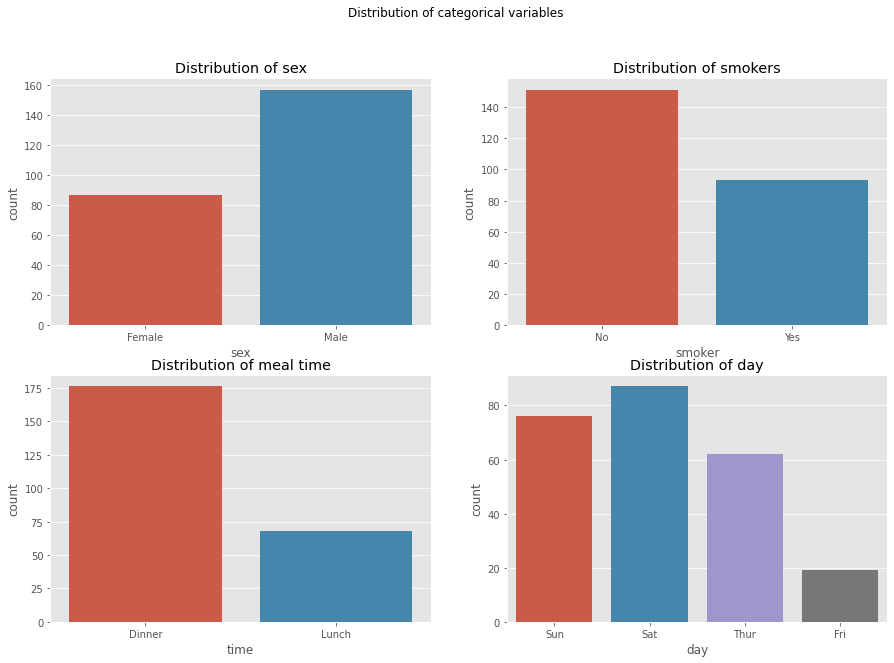

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flat

sns.countplot(x=df.sex, ax=ax[0])
ax[0].set_title("Distribution of sex")
sns.countplot(x=df.smoker, ax=ax[1])
ax[1].set_title("Distribution of smokers")
sns.countplot(x=df.time, ax=ax[2])
ax[2].set_title("Distribution of meal time")
sns.countplot(x=df.day, ax=ax[3])
ax[3].set_title("Distribution of day")

fig.suptitle("Distribution of categorical variables", fontsize=12);

<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observation</b>
<ul>
<li> Most of this restaurant's visitors are males.</li>    
<li> There are more non-smokers than smokers in the records.</li>
<li> The restaurant has a lot of visitors in the evening for dinner as opposed to lunch in the morning. </li>    
<li> The dataset contains transactions happening close to the weekend. Either the restaurant is open 4 days a week or the provided dataset is a subset of all transactions</li>
</ul>
</div>

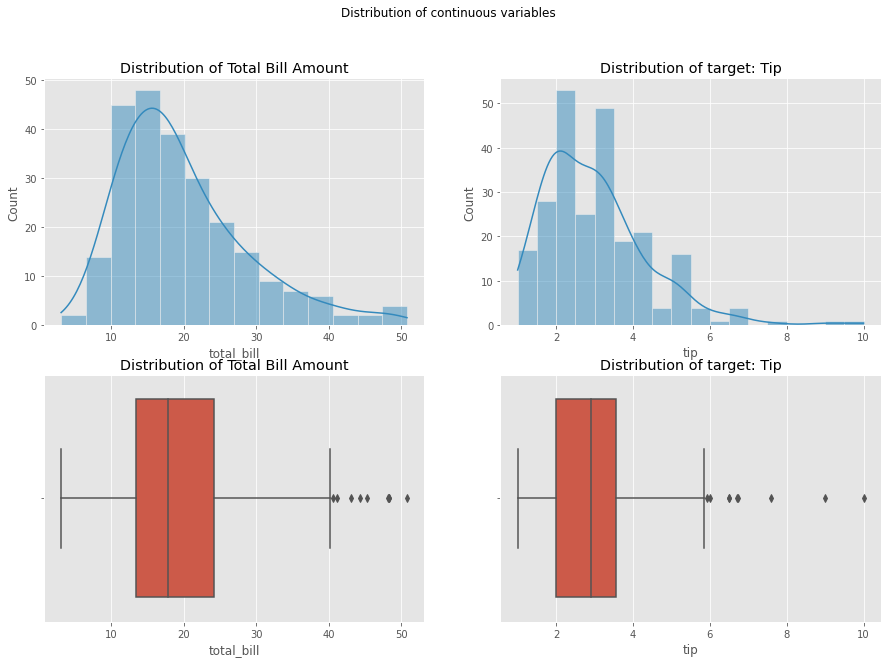

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flat

sns.histplot(x=df.total_bill, ax=ax[0], kde=True)
ax[0].set_title("Distribution of Total Bill Amount")
sns.histplot(x=df.tip, ax=ax[1], kde=True)
ax[1].set_title("Distribution of target: Tip")

sns.boxplot(x=df.total_bill, ax=ax[2])
ax[2].set_title("Distribution of Total Bill Amount")
sns.boxplot(x=df.tip, ax=ax[3])
ax[3].set_title("Distribution of target: Tip")


fig.suptitle("Distribution of continuous variables", fontsize=12);

<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observations</b>
<ul>
<li> The total bill amount seems to be highly concentrated around 15 dollars with a slight right skew. This seems to suggest that the restaurant is not a fine-dine or 5-star kind of restaurant but a more middle-class family restaurant where occasionally some person/family visit who have a lot of food as opposed to other people/family.</li>    
<li> Target variable Tip also seems to follow a left-skewed distribution with between 2 to 4 dollars being the most frequent range of tippers.</li>
<li> From the boxplot, we can see that the values over 40 dollars are potential outliers when it comes to this restaurant for total bills. Also the tip amounts over 6 dollars are very uncommon and potential outliers.</li>
</ul>
</div>

In [7]:
df[(df.tip > 6) & (df.total_bill > 40)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [8]:
df[(df.tip > 6) | (df.total_bill > 40)].sort_values(by=["total_bill", "tip"])

,total_bill,tip,sex,smoker,day,time,size
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
141,34.30,6.70,Male,No,Thur,Lunch,6
23,39.42,7.58,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
184,40.55,3.00,Male,Yes,Sun,Dinner,2
142,41.19,5.00,Male,No,Thur,Lunch,5
197,43.11,5.00,Female,Yes,Thur,Lunch,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3


Generally people who tip a lot are also the ones whose total_bill amounts are high, (almost all of these high tippers have bill amounts over 35$). However the converse is not necessarily true in this case.

We haven't looked at the size feature yet as we haven't been able to understand semantically what it means. Let's explore the unique values encountered in this feature and it's counts as well.

In [9]:
# Only retain the datapoints which don't have the total bill amount over 40$
df = df[df.total_bill <= 40].reset_index(drop=True)

In [10]:
df["size"].value_counts()

2    155
3     35
4     33
1      4
5      4
6      3
Name: size, dtype: int64

We don't have any explicit information about the `size` feature in our dataset. 

At first, we see that the attribute has numeric values, however after looking at the labels, it seems that out of all the 244 records, there's only a small number of unique values in this feature. This is an indication that this variable is most likely categorical in nature and we shall treat this as one. 

In [11]:
# Encode size as a string object now since we have decided to consider it as a categorical variable
df["size"] = df["size"].apply(lambda x: str(x))

In [12]:
df.describe()

,total_bill,tip
count,234.00000,234.000000
mean,18.70735,2.893675
std,7.32118,1.222398
min,3.07000,1.000000
25%,13.18750,2.000000
50%,17.38500,2.745000
75%,23.03000,3.500000
max,39.42000,7.580000


In [13]:
df.describe(include=object)

,sex,smoker,day,time,size
count,234,234,234,234,234
unique,2,2,4,2,6
top,Male,No,Sat,Dinner,2
freq,149,147,83,168,155


From the above exploratory stats, we can see, the categorical variables have quite a low cardinality.

Also the range of `total_bill` and `tip` don't seem to be out of the ordinary. This dataset therefore doesn't seem to have any missing values or any semantically encoded missing values.

### Univariate analysis/ Correlation analysis

Let us look at the distribution of the target variable with respect to each and every feature in our dataset. Since we have a continuous target, we can plot histograms of the output conditioned on our categorical variables and for one of the continuous variable, we can have a scatter-plot to understand how the latter corelates with the target.

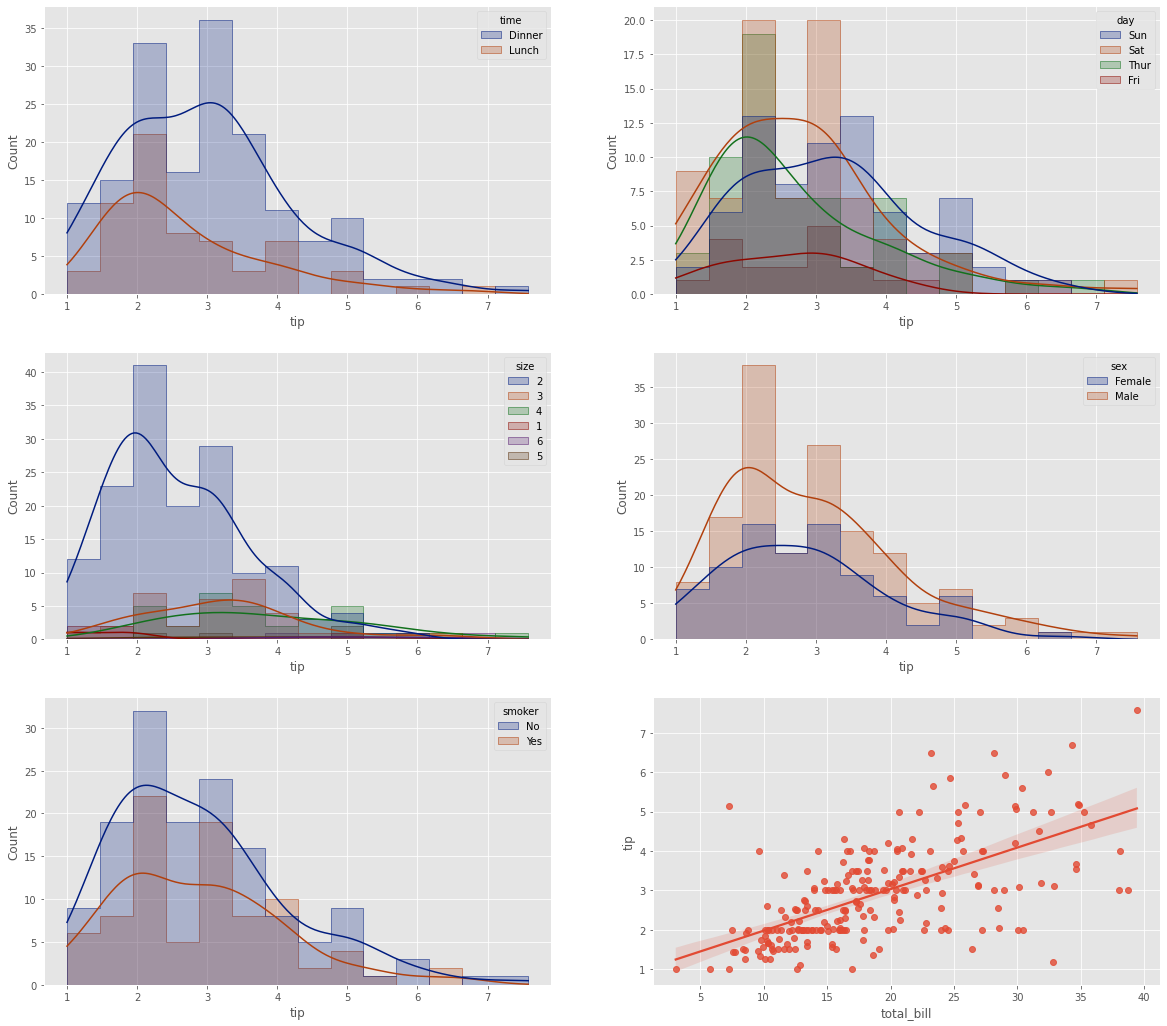

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
ax = ax.flatten()

# Create an inline function for the color palette
get_palette = lambda n: sns.color_palette("dark", n_colors=n)

# Plot the univariate plots of target wrt each feature
sns.histplot(
    data=df,
    x="tip",
    hue="time",
    kde=True,
    element="step",
    palette=get_palette(df.time.nunique()),
    ax=ax[0],
)
sns.histplot(
    data=df,
    x="tip",
    hue="day",
    kde=True,
    element="step",
    palette=get_palette(df.day.nunique()),
    ax=ax[1],
)
sns.histplot(
    data=df,
    x="tip",
    hue="size",
    kde=True,
    element="step",
    palette=get_palette(df["size"].nunique()),
    ax=ax[2],
)
sns.histplot(
    data=df,
    x="tip",
    hue="sex",
    kde=True,
    element="step",
    palette=get_palette(df.sex.nunique()),
    ax=ax[3],
)
sns.histplot(
    data=df,
    x="tip",
    hue="smoker",
    kde=True,
    element="step",
    palette=get_palette(df.smoker.nunique()),
    ax=ax[4],
)
sns.regplot(data=df, x="total_bill", y="tip", ax=ax[5]);

<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observations</b>
<ul>
<li> People seem to tip more dollars ar dinner than at lunch.</li>    
<li> A very weak hypothesis seems to be that people tip more dollars on Weekend than on Thursday/Friday; however the size of the data is not large enough and the difference is pretty meek; but nontheless the distributions seem to show this trend.</li>
<li> Smaller the size, lower the tip amount.</li>
<li> Gender and smoking habits don't seem to affect the tipped amount at all! The distributions of tip amount conditioned on these two features are near identical</li>
<li> Tipped amount seems to be positively linearly correlated with the total bill amount.</li>
</ul>
</div>

### Preprocessing the dataset

<div class="alert alert-block alert-info" style="color:gray">
    <ul>
    <li>Identify Null/Missing Values. Apply appropriate FE techniques.</li>
    <li>Do the correlational analysis on the dataset. Provide a visualization for the same.</li>
    <li>Comment on confounding variables if any.</li>
    </ul>
</div>

1. We need to reserve validation and test sets and use the remaining amount of data as training set.
2. Since the dataset has categorical features, we will have to encode them; there doesn't seem to be any order in the categorical featurs so One Hot Encoding seems to be the best suited.
3. The numeric column `total_amount` must be standardized/normalized.

> It is very important to have every feature on the same scale in this case because the algorithm we'd be using demands so. In case of Tree-based methods it wouldn't have mattered so much but for Locally Weighted Regression, it does!!

In [15]:
df["size"].value_counts()

2    155
3     35
4     33
1      4
5      4
6      3
Name: size, dtype: int64

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 80% Train - 10% Validation - 10% Test
df_train, df_eval = train_test_split(df, test_size=0.2, random_state=0)
df_valid, df_test = train_test_split(df_eval, test_size=0.5, random_state=1)

len(df), len(df_train), len(df_valid), len(df_test)

(234, 187, 23, 24)

In [17]:
# Preprocessing the categorical variables
OHE = OneHotEncoder(handle_unknown="ignore", drop="first")
OHE.fit(df_train.select_dtypes(include="object"))
feature_names = OHE.get_feature_names_out().tolist()

df_train_categorical = pd.DataFrame(
    OHE.transform(df_train.select_dtypes(include="object")).toarray(),
    columns=feature_names,
    index=df_train.index,
)
df_valid_categorical = pd.DataFrame(
    OHE.transform(df_valid.select_dtypes(include="object")).toarray(),
    columns=feature_names,
    index=df_valid.index,
)
df_test_categorical = pd.DataFrame(
    OHE.transform(df_test.select_dtypes(include="object")).toarray(),
    columns=feature_names,
    index=df_test.index,
)

In [18]:
# Preprocessing the numerical variables
SS = StandardScaler()
SS.fit(df_train["total_bill"].values.reshape(-1, 1))
df_train_numeric = pd.Series(
    SS.transform(df_train["total_bill"].values.reshape(-1, 1)).reshape(-1),
    name="total_bill",
    index=df_train.index,
)
df_valid_numeric = pd.Series(
    SS.transform(df_valid["total_bill"].values.reshape(-1, 1)).reshape(-1),
    name="total_bill",
    index=df_valid.index,
)
df_test_numeric = pd.Series(
    SS.transform(df_test["total_bill"].values.reshape(-1, 1)).reshape(-1),
    name="total_bill",
    index=df_test.index,
)

In [19]:
# Finally concatenate the preprocessed numeric and categorical columns together
final_df_train = pd.concat(
    [df_train_categorical, df_train_numeric, df_train.tip], axis=1
)
final_df_valid = pd.concat(
    [df_valid_categorical, df_valid_numeric, df_valid.tip], axis=1
)
final_df_test = pd.concat([df_test_categorical, df_test_numeric, df_test.tip], axis=1)

In [20]:
# Look at a few entries in the preprocessed train set
final_df_train.head(2)

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,size_2,size_3,size_4,size_5,size_6,total_bill,tip
75,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.095827,3.08
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.269584,2.45


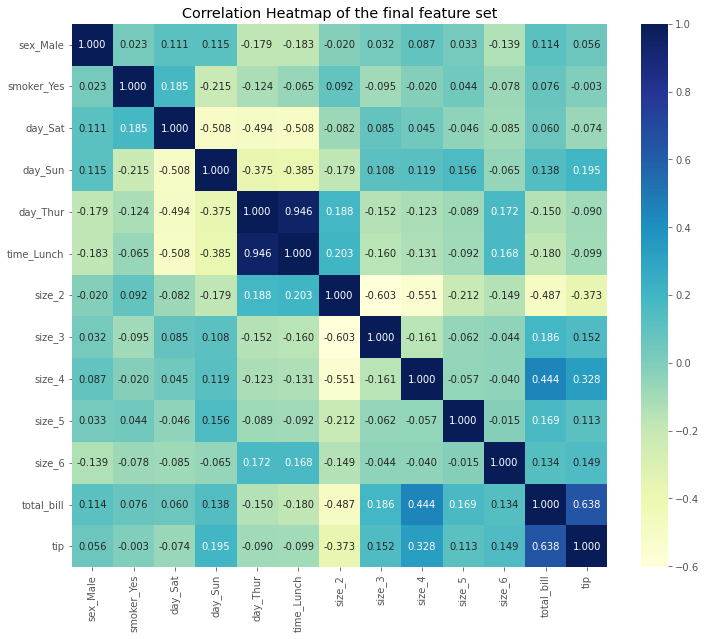

In [21]:
# Plot a correlation map of all the features
fig = plt.figure(figsize=(12, 10))
sns.heatmap(final_df_train.corr(), annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Correlation Heatmap of the final feature set");

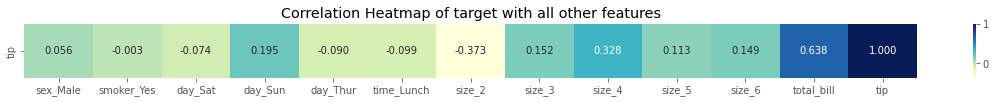

In [22]:
# Plot correlation map of target with all the features
plt.figure(figsize=(20, 1))
sns.heatmap(final_df_train.corr()[["tip"]].T, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Correlation Heatmap of target with all other features");

<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observations</b>
<ul>
<li> As seen from our previous univariate analysis, total_bill amount seems to the highest correlated with the tip; other variables have a very meek correlation with the output</li>    
<li> An interesting observation is that <i>day_Thur</i> and <i>time_Lunch</i> have extremely high correlation. This might lead to multicollinearity problems in the final analysis. We could choose to drop either of these columns in order to avoid this problem </li>
</ul>
</div>

## Part B

### Model Building

<div class="alert alert-block alert-info" style="color:gray">
    <ul>
    <li>Perform Model Development using locally weighted regression with appropriate hyperparameters.</li>
    <li>Train the model and print the appropriate evaluation parameters like R-Square/Adjusted-R-Square, Mean Square Error(MSE)/Root Mean Square Error(RMSE), Mean Absolute Error(MAE).</li>
    </ul>
</div>

**Note on LowessRegression**

Lowess stands for **LO**cally **WE**ighted regre**SS**ion and has historically been used for smoothing but it can be used for machine learning.

The philosophy of the method is simple. During inference, we fit a linear regression model using either

1. The whole dataset with a kernel which weighs each datapoint on the basis of the closeness to the inference datapoint.
2. A small neighbourhood of the dataset with equal/distance based weights.

This technique is implemented in `sklego` a library initiated by [Matthijs Brouns](https://www.mbrouns.com/about.html) & [Vincent D. Warmerdam](https://koaning.io/) as an open source project which has matured very well and used by many. There are two major hyper parameters in this technique

1. `sigma`: This hyperparameter controls the weight factor that should be assigned to each datapoint when deciding the LinReg coefficients on the fly. Higher sigmas tend to overfit, lower sigmas tend to underfit.
2. `span`: This hyperparameter controls the subspan of data to be used to locally fit a LinReg model by shutting down all other datapoints. Behaviour is similar to the above hyperparam.

In [23]:
from nbdev import show_doc
from sklego.linear_model import LowessRegression

show_doc(LowessRegression)

---

### LowessRegression

>      LowessRegression (sigma=1, span=None)

Does LowessRegression. Note that this *can* get expensive to predict.

In [24]:
# Drop the column having multi-collinearity problem i.e. `time_Lunch`.
X_train, y_train = (
    final_df_train.drop(columns=["tip", "time_Lunch"]).values,
    final_df_train.tip,
)
X_valid, y_valid = (
    final_df_valid.drop(columns=["tip", "time_Lunch"]).values,
    final_df_valid.tip,
)
X_test, y_test = (
    final_df_test.drop(columns=["tip", "time_Lunch"]).values,
    final_df_test.tip,
)

In [25]:
estimator = LowessRegression()
model = GridSearchCV(
    estimator,
    scoring="neg_root_mean_squared_error",
    param_grid={"sigma": np.arange(0.1, 0.6, 0.02), "span": np.arange(0.1, 1, 0.2)},
    cv=5,
)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LowessRegression(),
             param_grid={'sigma': array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 ,
       0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52,
       0.54, 0.56, 0.58]),
                         'span': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='neg_root_mean_squared_error')

In [26]:
model.best_estimator_

LowessRegression(sigma=0.5800000000000001, span=0.9000000000000001)

So, we can see that for the given problem, a `sigma` of 0.48 and a `span` of 0.9 seem to be the best hyperparameters after performing a 4-fold cross validation.

###  Performance Evaluation

<div class="alert alert-block alert-info" style="color:gray">
    <ul>
    <li> Do the prediction for the test data and display the results for the inference.</li>
    <li>Compare the accuracy of train data with test data. Provide appropriate analysis for the same for all cases.</li>
    <li> Write your observation for result of each question and justify your answer.</li>    
    </ul>
</div>

In [27]:
from math import sqrt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def get_metrics(X, y):
    preds = model.best_estimator_.predict(X)
    r2 = r2_score(y, preds)
    mae = mean_absolute_error(y, preds)
    rmse = sqrt(mean_squared_error(y, preds))
    return (r2, mae, rmse)

In [28]:
train_metrics = get_metrics(X_train, y_train)
valid_metrics = get_metrics(X_valid, y_valid)
test_metrics = get_metrics(X_test, y_test)

metrics_df = pd.DataFrame(
    [train_metrics, valid_metrics, test_metrics],
    index=["Train", "Valid", "Test"],
    columns=["R2_Score", "MAE", "RMSE"],
)

metrics_df

,R2_Score,MAE,RMSE
Train,0.697835,0.503886,0.672360
Valid,0.147617,1.009130,1.245030
Test,0.677030,0.480999,0.572967


<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observations</b>
<ul>
<li> Train and test scores seem to agree well with one another.</li>    
<li> A higher R2 score yields lower error score which is in line with the definition of the two terms.</li>
<li> The validation scores however seem to be very different from train and test scores across all the metrics.</li>
</ul>
</div>

Let us look at some examples in validation set  where we have a large error value and try to investigate the cause for the same.

In [29]:
df_valid["Tip_preds"] = model.best_estimator_.predict(X_valid)
df_valid["Error"] = abs(df_valid["tip"] - df_valid["Tip_preds"])
df_valid[df_valid.Error > 1].sort_values(by=["Error"], ascending=False)

,total_bill,tip,sex,smoker,day,time,size,Tip_preds,Error
176,23.17,6.50,Male,Yes,Sun,Dinner,4,3.754740,2.745260
138,34.30,6.70,Male,No,Thur,Lunch,6,4.439950,2.260050
149,24.55,2.00,Male,No,Sun,Dinner,4,4.106028,2.106028
106,14.31,4.00,Female,Yes,Sat,Dinner,2,2.178898,1.821102
92,16.32,4.30,Female,Yes,Fri,Dinner,2,2.686697,1.613303
104,25.21,4.29,Male,Yes,Sat,Dinner,2,2.815642,1.474358
7,26.88,3.12,Male,No,Sun,Dinner,4,4.556510,1.436510
101,20.92,4.08,Female,No,Sat,Dinner,2,2.750659,1.329341
182,15.69,1.50,Male,Yes,Sun,Dinner,2,2.634135,1.134135
150,19.77,2.00,Male,No,Sun,Dinner,4,3.003378,1.003378


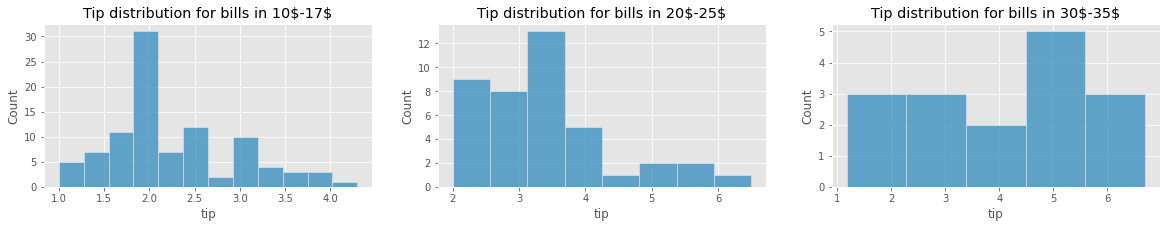

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
sns.histplot(df[(df.total_bill > 10) & (df.total_bill < 17)].tip, ax=ax[0])
ax[0].set_title("Tip distribution for bills in 10\$-17\$")
sns.histplot(df[(df.total_bill > 20) & (df.total_bill < 25)].tip, ax=ax[1])
ax[1].set_title("Tip distribution for bills in 20\$-25\$")
sns.histplot(df[(df.total_bill > 30) & (df.total_bill < 35)].tip, ax=ax[2])
ax[2].set_title("Tip distribution for bills in 30\$-35\$");

In [63]:
df[df["size"] == "6"]

,total_bill,tip,sex,smoker,day,time,size
122,29.80,4.2,Female,No,Thur,Lunch,6
138,34.30,6.7,Male,No,Thur,Lunch,6
139,27.05,5.0,Female,No,Thur,Lunch,6


<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observations</b>
<ul>
<li> Consider entry 176 from the above table. It shows a customer who tipped 6.5 \$ for a bill amount of 23.17 \$. If we were to look at the dataset, a vast majority of folks who had their bills in 20-25 \$ range have paid an average of close to 4 \$ and our model has predicted 3.75 \$. Looks like this customer is an outlier of sorts who happened to be extra generous on that day... </li>    
<li> Consider entry 138 from the above table. It has it's size feature as 6. In our entire dataset, we only have three examples of size 6, one of which is in validation which means there's only 2 in the train set. This kind of datapoint is not seen during training a lot so, we're not able to predict well in this case.</li>
<li> Consider entry 106 from the above table. Similar to record 176, the tip paid is way out of range for someone having a bill of just 14 \$.</li>
</ul>
</div>

So, our validation set seems to have a lot of data which is not seen a lot in the training set.

**But wait, we're never training, we're lazily evaluating at test time, so why does it still matter?**

`LOWESS` by definition is super-sensitive to the datapoints in the vicinity of the point for which the prediction is to be made. Hence, when we see that most people whose dinner costs within 10 \$ - 15 \$ pay around 2 \$ as tip, that's what our model is going to estimate. 

## References

1. [sklego lowess](https://scikit-lego.readthedocs.io/en/latest/linear-models.html)
2. [Local Regression - Wikipedia](https://en.wikipedia.org/wiki/Local_regression)
3. Tom Mitchell Ch 8.3 LOWESS

# Appendix

There are several different ways of encoding Categorical Variables. We shall now try Target Encoding to check if we're able to do any better on the given dataset.